In [4]:
import pandas as pd
import json

from main import score_comment

In [ ]:

# Load the JSON data
with open('posts.json', 'r') as f:
    data = json.load(f)

# Initialize an empty list to store the scored comments
scored_comments = []

# Iterate over each post
for post in data:
    title = post['title']
    comments = post['comments']

    # Iterate over each comment and score it
    for comment in comments:
        score = score_comment(comment)
        scored_comments.append({'title': title, 'comment': comment, 'toxic': score['toxic'], 'severe_toxic': score['severe_toxic'], 'obscene': score['obscene'], 'threat': score['threat'], 'insult': score['insult'], 'identity_hate': score['identity_hate']})

# Create a DataFrame from the scored comments
df = pd.DataFrame(scored_comments)

# Save the DataFrame as a CSV file
df.to_csv('scored_comments2.csv', index=False)

In [6]:
df = pd.read_csv('scored_comments2.csv')
df.head()

,title,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Kailash Sirohiya has 3 separate nagarikta numb...,They wanna distract people from the real facts...,True,False,False,False,True,False
1,Kailash Sirohiya has 3 separate nagarikta numb...,"He own Kantipur doesn’t he? They will create, ...",False,False,False,False,False,False
2,Kailash Sirohiya has 3 separate nagarikta numb...,Yeah they are trying to potray Sirohiya as Pat...,False,False,False,False,False,False
3,Kailash Sirohiya has 3 separate nagarikta numb...,They think we all are foolish. All nepali cit...,False,False,False,False,False,False
4,Kailash Sirohiya has 3 separate nagarikta numb...,not only kantipur each and every big media out...,True,False,False,False,False,False


In [7]:
import pandas as pd
import re

# Load the CSV file into a DataFrame
df = pd.read_csv('scored_comments.csv')

# Define a function to remove unwanted comments
def remove_unwanted_comments(comment):
    # Check for "[deleted]" or "[removed]"
    if comment in ["[deleted]", "[removed]"]:
        return ""
    
    # Remove Nepali text using regular expressions
    comment = re.sub(r'[\u0900-\u097F]+', '', comment)
    
    return comment

# Apply the function to the 'comment' column
df['comment'] = df['comment'].apply(remove_unwanted_comments)

# Drop rows with empty comments
df = df[df['comment'] != '']

# Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_comments.csv', index=False)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('scored_comments2.csv')

# Display the first few rows of the dataframe

In [31]:
evaluation_metrics = {  # Assuming weights as provided in the prompt
    'severe_toxic': 0.3,
    'threat': 0.25,
    'insult': 0.15,
    'identity_hate': 0.15,
    'toxic': 0.1,
    'obscene': 0.05
}

In [42]:
df["toxicity_percentage"] = 0

# Function to calculate toxicity percentage for each row
def calculate_toxicity(row):
  toxicity_score = 0
  for col, weight in evaluation_metrics.items():
    if row[col]:
      toxicity_score += weight
  return toxicity_score

# Apply the function to each row with vectorized apply
df["toxicity_percentage"] = df.apply(calculate_toxicity, axis=1)
df.head()

,title,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity_percentage
0,Kailash Sirohiya has 3 separate nagarikta numb...,They wanna distract people from the real facts...,True,False,False,False,True,False,0.25
1,Kailash Sirohiya has 3 separate nagarikta numb...,"He own Kantipur doesn’t he? They will create, ...",False,False,False,False,False,False,0.00
2,Kailash Sirohiya has 3 separate nagarikta numb...,Yeah they are trying to potray Sirohiya as Pat...,False,False,False,False,False,False,0.00
3,Kailash Sirohiya has 3 separate nagarikta numb...,They think we all are foolish. All nepali cit...,False,False,False,False,False,False,0.00
4,Kailash Sirohiya has 3 separate nagarikta numb...,not only kantipur each and every big media out...,True,False,False,False,False,False,0.10


In [57]:
average_toxicity_per_title = df.groupby('title')['toxicity_percentage'].mean().sort_values(ascending=False)
average_toxicity_per_title

title
'Bichara' vannu agadi dherai sochnu                                                                                    0.077660
Needs some motivation in my life                                                                                       0.065556
remember meri bassai and eaku eaku ?                                                                                   0.065152
Badar le dukha diyo guys k garne hola                                                                                  0.061268
Is Nepal even incapable of giving 12 hours of electricity a day                                                        0.059615
How much unemployment do we have here?                                                                                 0.050000
Baru bidesh ma paley hunxu tara nepali police hudaina                                                                  0.050000
Together we stand, divided we fall                                                                

In [58]:
for i in range(5):
    title = average_toxicity_per_title.index[i]
    toxicity = average_toxicity_per_title[i]
    print(f'{i+1}. {title}: {toxicity*10:.2%}')

1. 'Bichara' vannu agadi dherai sochnu: 77.66%
2. Needs some motivation in my life: 65.56%
3. remember meri bassai and eaku eaku ?: 65.15%
4. Badar le dukha diyo guys k garne hola: 61.27%
5. Is Nepal even incapable of giving 12 hours of electricity a day: 59.62%


C:\Users\KNYpe\AppData\Local\Temp\ipykernel_23788\3117521391.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  toxicity = average_toxicity_per_title[i]


<Axes: xlabel='title'>

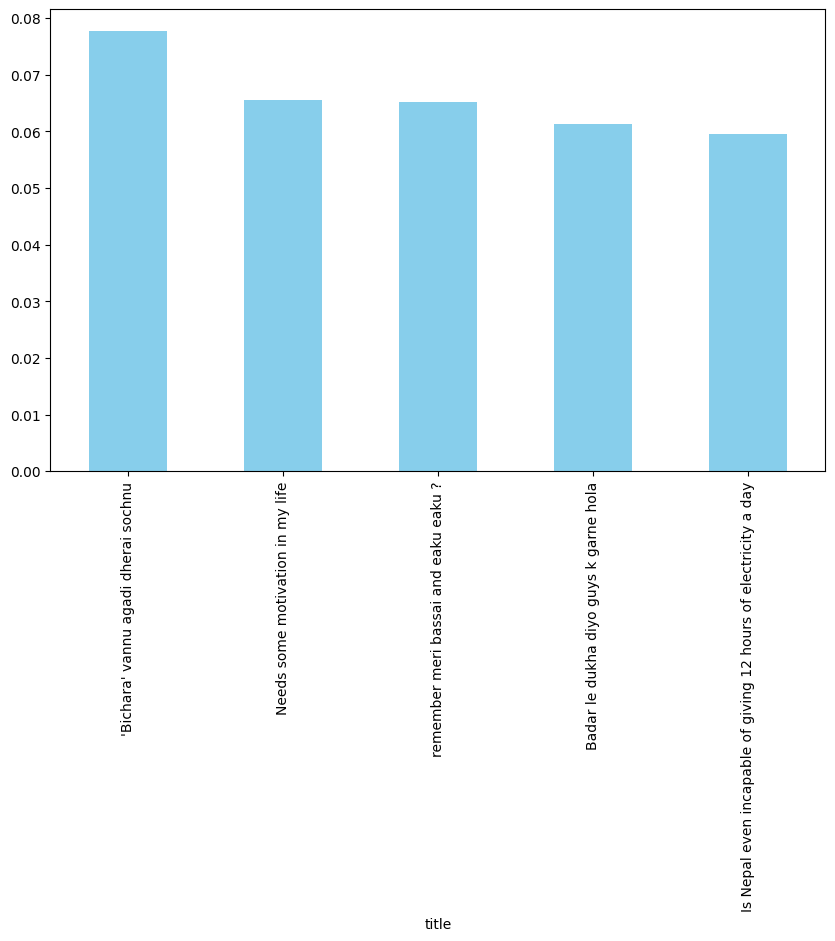

In [67]:
average_toxicity_per_title[:5].plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='title'>

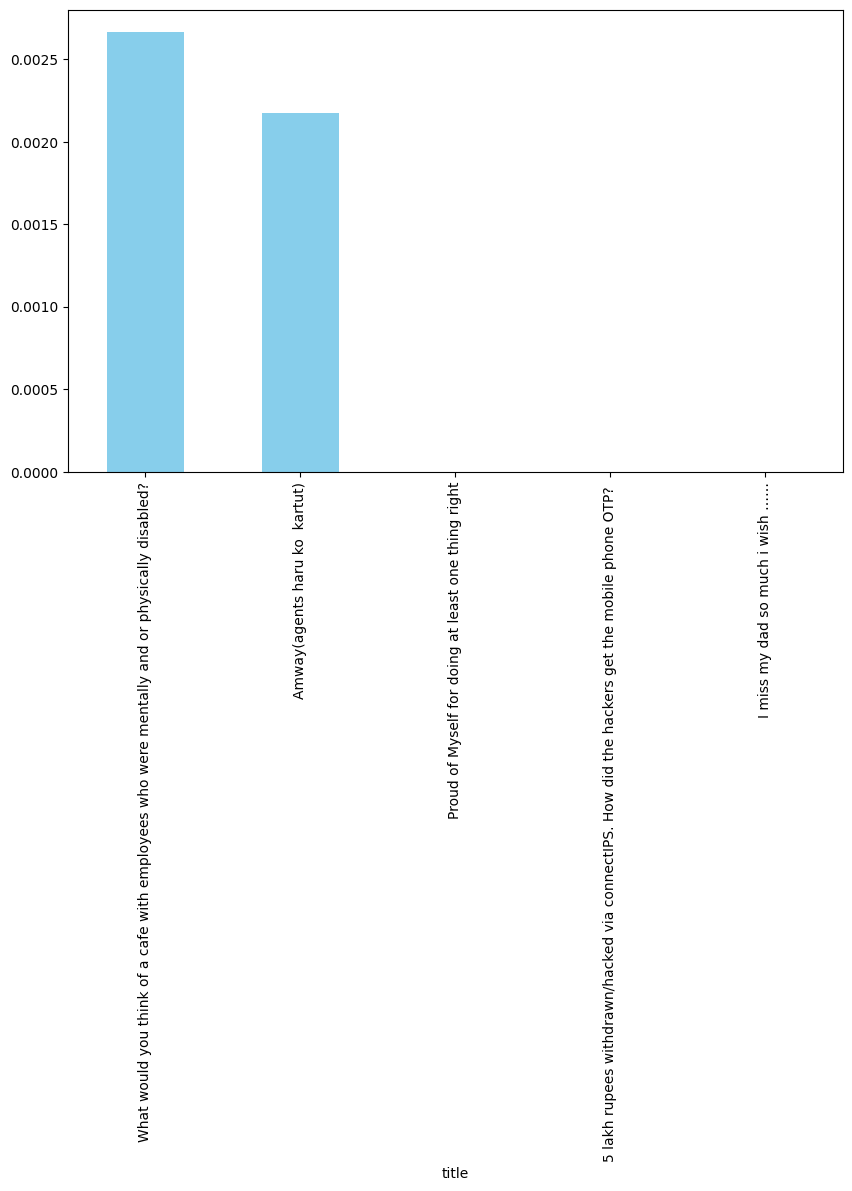

In [75]:
average_toxicity_per_title.tail().plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='title'>

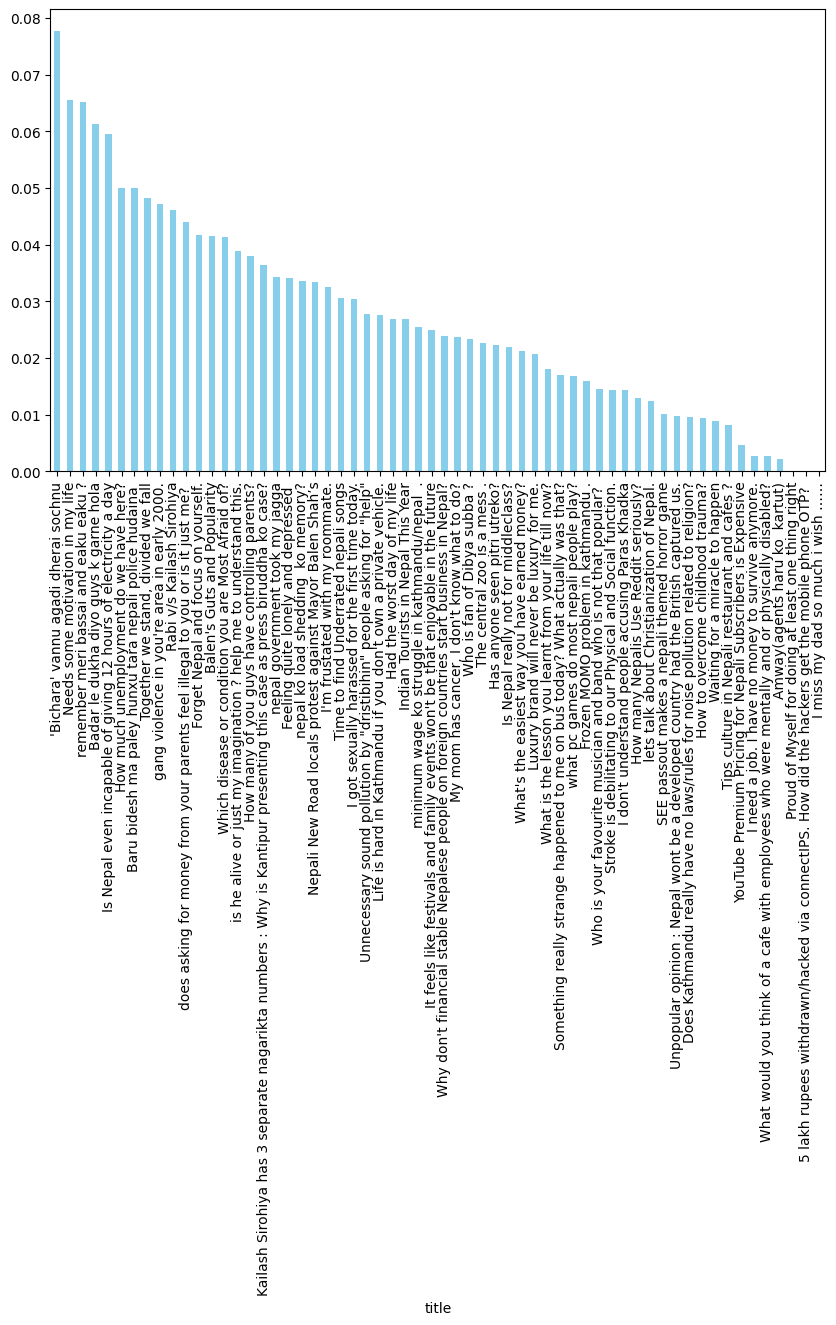

In [82]:
average_toxicity_per_title.plot(kind='bar', figsize=(10, 6), color='skyblue')

In [91]:
df = pd.read_csv('scored_comments2.csv')
df.head()

,title,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Kailash Sirohiya has 3 separate nagarikta numb...,They wanna distract people from the real facts...,True,False,False,False,True,False
1,Kailash Sirohiya has 3 separate nagarikta numb...,"He own Kantipur doesn’t he? They will create, ...",False,False,False,False,False,False
2,Kailash Sirohiya has 3 separate nagarikta numb...,Yeah they are trying to potray Sirohiya as Pat...,False,False,False,False,False,False
3,Kailash Sirohiya has 3 separate nagarikta numb...,They think we all are foolish. All nepali cit...,False,False,False,False,False,False
4,Kailash Sirohiya has 3 separate nagarikta numb...,not only kantipur each and every big media out...,True,False,False,False,False,False


In [ ]:
toxic_count = 0
severe_toxic_count = 0
obscene_count = 0
threat_count = 0
insult_count = 0
identity_hate_count = 0
note_toxic_count = 0
for i in range(len(df)):
    if df.iloc[i]['toxic']:
        toxic_count += 1
    else:
        note_toxic_count += 1
    if df.iloc[i]['severe_toxic']:
        severe_toxic_count += 1
    else:
        note_toxic_count += 1
    if df.iloc[i]['obscene']:
        obscene_count += 1
    else:
        note_toxic_count += 1
    if df.iloc[i]['threat']:
        threat_count += 1
    else:
        note_toxic_count += 1
    if df.iloc[i]['insult']:
        insult_count += 1
    else:
        note_toxic_count += 1
    if df.iloc[i]['identity_hate']:
        identity_hate_count += 1
    else:
        note_toxic_count += 1

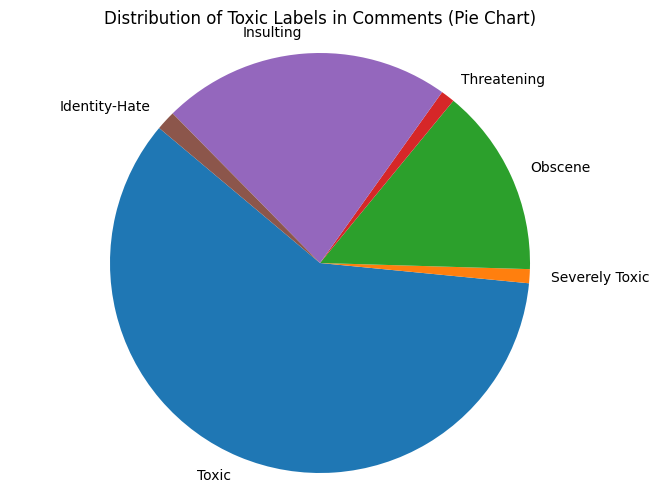

In [103]:
data = {
    "Toxicity Type": ["Toxic", "Severely Toxic", "Obscene", "Threatening", "Insulting", "Identity-Hate"],
    "Count": [toxic_count, severe_toxic_count, obscene_count, threat_count, insult_count, identity_hate_count]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Create a pie chart (note: pie charts are not ideal for many categories)
plt.figure(figsize=(8, 6))
plt.pie(df["Count"], labels=df["Toxicity Type"], startangle=140)  # Customize as needed
plt.title("Distribution of Toxic Labels in Comments (Pie Chart)")
plt.axis("equal")  # Equal aspect ratio for a circular pie chart
plt.show()

In [ ]:
#  correlaton between the different toxicity labels and commetns

print(note_toxic_count)